In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import pearsonr
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from pylab import rcParams
import matplotlib.ticker as mt
from matplotlib.ticker import ScalarFormatter

<a id='top'></a>
# World Food Programme: food price and affordability analysis
#### Data understanding and preparation
### [Food and agriculture organisation in the UN: Number of undernourisched people by country](https://www.fao.org/faostat/en/#data/SDGB)

#### [Data understanding](#understanding)

#### [Data wrangling](#wrangling)

#### [Data cleaning](#cleaning)

#### [Distribution analysis](#distribution)


<a id='understanding'></a>
### Data understanding
[Back to top](#top)

In [2]:
path=r'C:\Users\frauz\Documents\Python Projects\Final Project\Data' #creating a path

In [3]:
df_hunger=pd.read_csv(os.path.join(path,'nr_undernourished.csv'),index_col=False) #importing data

In [4]:
df_hunger.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (SDG),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,SDGB,SDG Indicators,4,Afghanistan,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2001,2001,million No,9.3,A,Official figure,Estimated | Food and Agriculture Organization ...
1,SDGB,SDG Indicators,4,Afghanistan,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2002,2002,million No,9.3,A,Official figure,Estimated | Food and Agriculture Organization ...
2,SDGB,SDG Indicators,4,Afghanistan,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2003,2003,million No,8.7,A,Official figure,Estimated | Food and Agriculture Organization ...
3,SDGB,SDG Indicators,4,Afghanistan,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2004,2004,million No,8.6,A,Official figure,Estimated | Food and Agriculture Organization ...
4,SDGB,SDG Indicators,4,Afghanistan,6132,Value,SN_ITK_DEFCN,2.1.1 Number of undernourished people,2005,2005,million No,8.5,A,Official figure,Estimated | Food and Agriculture Organization ...


In [5]:
df_hunger.info() #analysing data shape ad data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5186 entries, 0 to 5185
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       5186 non-null   object
 1   Domain            5186 non-null   object
 2   Area Code (M49)   5186 non-null   int64 
 3   Area              5186 non-null   object
 4   Element Code      5186 non-null   int64 
 5   Element           5186 non-null   object
 6   Item Code (SDG)   5186 non-null   object
 7   Item              5186 non-null   object
 8   Year Code         5186 non-null   int64 
 9   Year              5186 non-null   int64 
 10  Unit              5186 non-null   object
 11  Value             2560 non-null   object
 12  Flag              5186 non-null   object
 13  Flag Description  5186 non-null   object
 14  Note              5186 non-null   object
dtypes: int64(4), object(11)
memory usage: 607.9+ KB


In [6]:
df_hunger.describe().apply(lambda s: s.apply('{0:.5f}'.format)) # basic statistics

,Area Code (M49),Element Code,Year Code,Year
count,5186.00000,5186.00000,5186.00000,5186.00000
mean,438.90841,6132.00000,2010.95970,2010.95970
std,251.85184,0.00000,6.03686,6.03686
min,4.00000,6132.00000,2001.00000,2001.00000
25%,226.00000,6132.00000,2006.00000,2006.00000
50%,440.00000,6132.00000,2011.00000,2011.00000
75%,659.00000,6132.00000,2016.00000,2016.00000
max,894.00000,6132.00000,2021.00000,2021.00000


In [7]:
df_hunger['Unit'].value_counts()

million No    5186
Name: Unit, dtype: int64

In [8]:
df_hunger.isnull().sum()

Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (SDG)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value               2626
Flag                   0
Flag Description       0
Note                   0
dtype: int64

<a id='wrangling'></a>
### Data wrangling
[Back to top](#top)

In [9]:
# Out of 15 columns, I leave only 3 that are valuable for the further analysis 

col_list=df_hunger.columns.to_list()
col_list

['Domain Code',
 'Domain',
 'Area Code (M49)',
 'Area',
 'Element Code',
 'Element',
 'Item Code (SDG)',
 'Item',
 'Year Code',
 'Year',
 'Unit',
 'Value',
 'Flag',
 'Flag Description',
 'Note']

In [10]:
col_needed=['Area',
            'Year',
            'Value']

In [11]:
# removing the list of needed columns from the main list

remove_cols=list(set(col_list)-set(col_needed))
remove_cols

['Flag Description',
 'Item Code (SDG)',
 'Item',
 'Domain',
 'Flag',
 'Note',
 'Element',
 'Year Code',
 'Area Code (M49)',
 'Element Code',
 'Unit',
 'Domain Code']

In [12]:
# Dropping the unnecessary columns

df_hun=df_hunger.drop(columns=remove_cols)

In [13]:
df_hun.head()

,Area,Year,Value
0,Afghanistan,2001,9.3
1,Afghanistan,2002,9.3
2,Afghanistan,2003,8.7
3,Afghanistan,2004,8.6
4,Afghanistan,2005,8.5


In [14]:
# Renaming the columns
df_hun.rename(columns={'Area':'country',
                       'Year':'year',
                       'Value':'millions_undernourished'},
                       inplace=True)

In [15]:
df_hun.head(10)

,country,year,millions_undernourished
0,Afghanistan,2001,9.3
1,Afghanistan,2002,9.3
2,Afghanistan,2003,8.7
3,Afghanistan,2004,8.6
4,Afghanistan,2005,8.5
5,Afghanistan,2006,8.1
6,Afghanistan,2007,7.4
7,Afghanistan,2008,6.8
8,Afghanistan,2009,6.1
9,Afghanistan,2010,5.8


In [16]:
df_hun.dtypes # checking data types.

country                    object
year                        int64
millions_undernourished    object
dtype: object

In [17]:
# Dataframe contains values <0.1 that can't be changed to floats. They will be replaced with '0.1'

df_hun.replace('<0.1', '0.1', inplace=True)

In [18]:
# Changing the data types

df_hun=df_hun.astype({'millions_undernourished':'float'})

In [19]:
df_hun.dtypes

country                     object
year                         int64
millions_undernourished    float64
dtype: object

In [20]:
df_hun.describe()

,year,millions_undernourished
count,5186.000000,2560.000000
mean,2010.959699,5.304570
std,6.036862,19.913341
min,2001.000000,0.100000
25%,2006.000000,0.200000
50%,2011.000000,1.300000
75%,2016.000000,3.800000
max,2021.000000,249.600000


<a id='cleaning'></a>
### Data cleaning
[Back to top](#top)

In [21]:
# Some countries don't have values for all or some years and countries. Missing values will be handled later when this data is merged with the main data set

df_hun.isnull().sum() 

country                       0
year                          0
millions_undernourished    2626
dtype: int64

In [22]:
# Addressig duplicates 
df_hun['year'].value_counts()

2001    248
2002    248
2019    248
2018    248
2017    248
2016    248
2015    248
2014    248
2013    248
2012    248
2011    248
2010    248
2009    248
2008    248
2007    248
2006    248
2005    248
2004    248
2003    248
2020    237
2021    237
Name: year, dtype: int64

In [23]:
df_hun['country'].value_counts()

Afghanistan                       21
Russian Federation                21
Nepal                             21
Netherlands (Kingdom of the)      21
New Caledonia                     21
                                  ..
Cocos (Keeling) Islands           19
Christmas Island                  19
Chagos Archipelago                19
Åland Islands                     19
Svalbard and Jan Mayen Islands    19
Name: country, Length: 248, dtype: int64

In [24]:
# Checking for duplicates 
df_hun.duplicated().value_counts() # no duplicates detected

False    5186
dtype: int64

<a id='distribution'></a>
### Distribution analysis
[Back to top](#top)

In [25]:
# Normalizing the variables in order to plot the distribution
var=df_hun[['year','millions_undernourished']].values # extracting values from the columns

scaler=preprocessing.MinMaxScaler() # scaling the data in each column
var_scaled=scaler.fit_transform(var)

df_scaled=pd.DataFrame(var_scaled) # creating a new dataframe of scaled data
df_scaled.columns=['year','millions_undernourished']

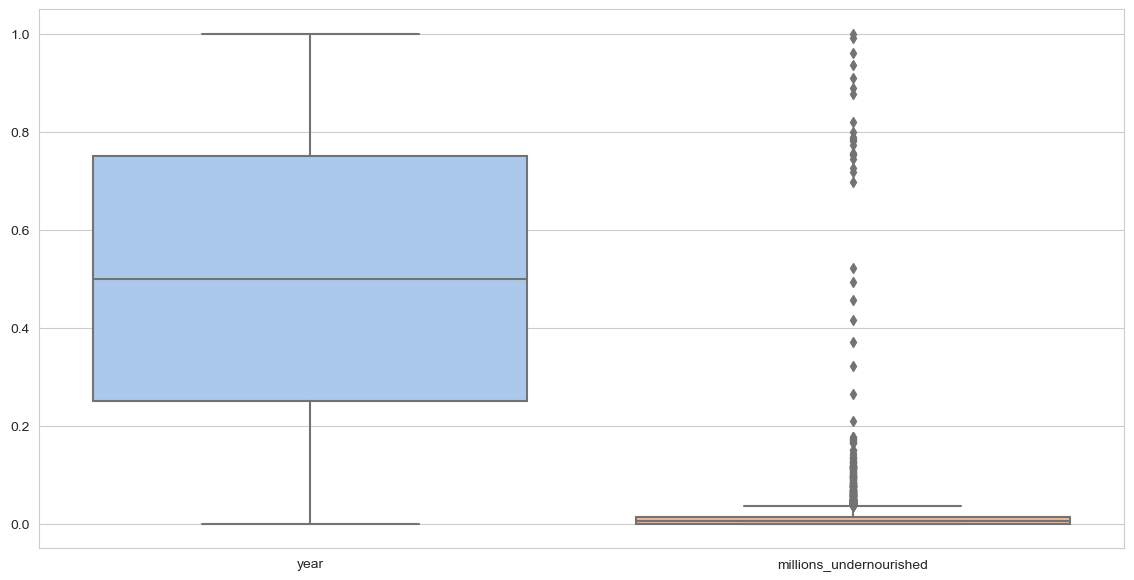

In [25]:
%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')
boxplot=sns.boxplot(data=df_scaled, palette='pastel') # plotting the normalized data 

#### Millions of undernourished people data has  a high number of outliers. However, considering that a high numbers are observed in a small number of countries, these values don't look unnatural. 

In [27]:
# To confirm this assumption I'm looking at the record with the maximum value 

df_hun.iloc[df_hun['millions_undernourished'].idxmax()] # According to my domain knowledge, this value is accurate

country                    India
year                        2004
millions_undernourished    249.6
Name: 2217, dtype: object

In [64]:
# Exporting the data for further analysis
df_hun.to_pickle(os.path.join(path,'Data Prepared', 'nr_undernourished.pkl'))

In [27]:
# Creating a new path

path1=r'C:\Users\frauz\Documents\Python Projects\My projects'



In [29]:
df_countries=pd.read_csv(os.path.join(path1,'country_names_codes_regions.csv'), encoding='latin1')

In [30]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country_Name       310 non-null    object
 1   Country            310 non-null    object
 2   Currency           310 non-null    object
 3   Country_Name_1     310 non-null    object
 4   Development_Stage  309 non-null    object
 5   Region             310 non-null    object
 6   Region_1           310 non-null    object
 7   Country_Code_?     310 non-null    object
 8   ISO_code           303 non-null    object
dtypes: object(9)
memory usage: 21.9+ KB


In [31]:
df_hun_iso=df_hun.merge(df_countries[['Country_Name','ISO_code']], how='left', left_on='country',right_on='Country_Name')

In [32]:
df_hun_iso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5186 entries, 0 to 5185
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  5186 non-null   object 
 1   year                     5186 non-null   int64  
 2   millions_undernourished  2560 non-null   float64
 3   Country_Name             4242 non-null   object 
 4   ISO_code                 4200 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 243.1+ KB


In [35]:
df_hun_iso[df_hun_iso['ISO_code'].isnull()]['country'].unique()

# Unfortunatelly quite a lot of countries couldn't be matched

array(['Åland Islands', 'Anguilla', 'Bonaire, Sint Eustatius and Saba',
       'British Virgin Islands', 'Chagos Archipelago', 'Channel Islands',
       'China, mainland', 'China, Taiwan Province of', 'Christmas Island',
       'Cocos (Keeling) Islands', 'Cook Islands', "Côte d'Ivoire",
       'Curaçao', 'Czechia', "Democratic People's Republic of Korea",
       'Eswatini', 'Falkland Islands (Malvinas)',
       'French Southern Territories', 'Gibraltar', 'Guadeloupe',
       'Guernsey', 'Heard and McDonald Islands', 'Holy See', 'Jersey',
       'Martinique', 'Mayotte', 'Micronesia (Federated States of)',
       'Montserrat', 'Nauru', 'Netherlands (Kingdom of the)', 'Niue',
       'Norfolk Island', 'North Macedonia', 'Palestine', 'Pitcairn',
       'Réunion', 'Saint Barthélemy',
       'Saint Helena, Ascension and Tristan da Cunha',
       'Saint Martin (French part)', 'Saint Pierre and Miquelon',
       'Sint Maarten (Dutch part)',
       'South Georgia and the South Sandwich Islands',